

# **Recency, Frequency, and Monetary Value analysis (RFM Analysis)**



In the fast-paced landscape of modern business, gaining a deep understanding of customer behavior is paramount. The RFM (Recency, Frequency, Monetary) analysis framework has emerged as a powerful tool for businesses to unlock the potential hidden within their customer data. This project delves into the world of RFM analysis, leveraging data-driven insights to enhance decision-making processes and drive business growth.

Recency, Frequency, and Monetary (RFM) analysis, rooted in the Pareto Principle, provides a structured approach to segmenting customers based on their historical transaction data. It begins by assessing each customer's recency, i.e., how recently they made a purchase, followed by their frequency of transactions, and finally, the monetary value of those transactions. These three critical dimensions create a multidimensional space in which customers can be categorized into distinct segments, each representing a unique behavioral profile. By applying RFM analysis, businesses can move beyond one-size-fits-all marketing strategies and tailor their approaches to specific customer segments, thus improving engagement and retention.

In [30]:
import pandas as pd                
import plotly.express as px        
import plotly.io as pio            
import plotly.graph_objects as go  
from datetime import datetime      

import dash
import dash_core_components as dcc
import dash_html_components as html

pio.templates.default = "plotly_white"


data = pd.read_csv("data.csv")
print(data.head())
data.dropna(inplace=True)

   CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0        8814   2023-04-11             943.31          Product C   890075   
1        2188   2023-04-11             463.70          Product A   176819   
2        4608   2023-04-11              80.28          Product A   340062   
3        2559   2023-04-11             221.29          Product A   239145   
4        9482   2023-04-11             739.56          Product A   194545   

   Location  
0     Tokyo  
1    London  
2  New York  
3    London  
4     Paris  


# **Converting PurchaseDate to datetime format for analysis**

In [31]:
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])


# **Calculating Recency**

# Recency - the number of days between the current date and the last purchase date

            Recency  Frequency  Monetary
CustomerID                              
1011             34          2   1129.02
1025             22          1    359.29
1029              1          1    704.99
1046             44          1    859.82
1049             14          1    225.72


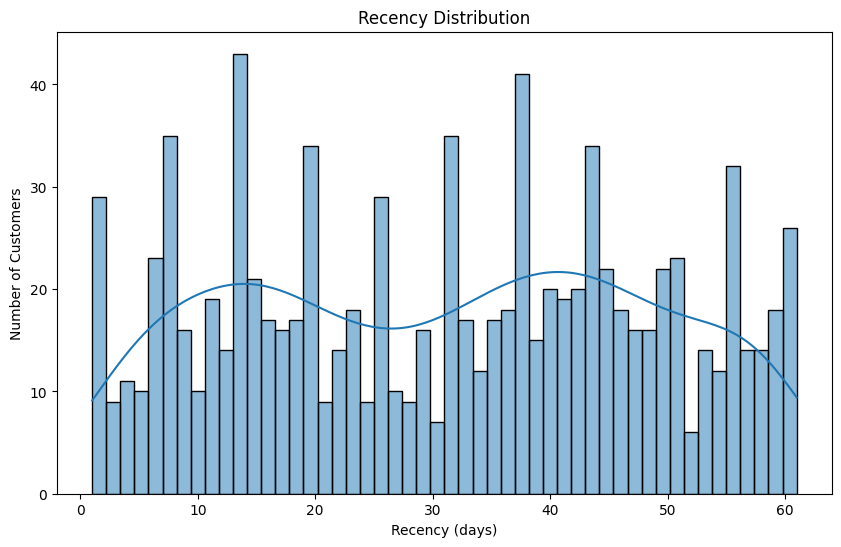

In [32]:
current_date = data['PurchaseDate'].max() + pd.Timedelta(days=1)

rfm = data.groupby('CustomerID').agg({
    'PurchaseDate': lambda x: (current_date - x.max()).days, 
    'OrderID': 'count',  
    'TransactionAmount': 'sum' 
}).rename(columns={'PurchaseDate': 'Recency', 'OrderID': 'Frequency', 'TransactionAmount': 'Monetary'})

print(rfm.head())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(rfm['Recency'], bins=50, edgecolor='k', kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Number of Customers')
plt.show()

# print(data['Recency'].describe())

# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.hist(data['Recency'], bins=50, edgecolor='k', alpha=0.7)
# plt.title('Recency Distribution')
# plt.xlabel('Recency (days)')
# plt.ylabel('Number of Customers')
# plt.show()



# **RFM Segmentation**

In [33]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates="drop")
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

print(rfm.head())


            Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
CustomerID                                                                
1011             34          2   1129.02       3       5       5       355
1025             22          1    359.29       4       1       2       412
1029              1          1    704.99       5       1       4       514
1046             44          1    859.82       2       1       5       215
1049             14          1    225.72       4       1       2       412


# **Data Visualization**

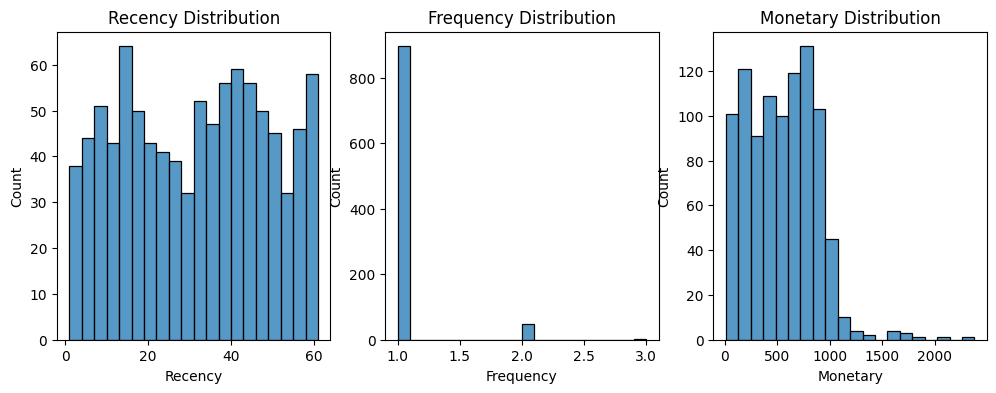

In [34]:
# Distribution of RFM metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=20)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=20)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=20)
plt.title('Monetary Distribution')
plt.show()

# **Dash Visualizations using Plotly with Interactive 3D scatter plot for RFM segments**

In [35]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import random


app = dash.Dash(__name__)


data = {
    'Recency': [random.randint(1, 365) for _ in range(100)],
    'Frequency': [random.randint(1, 10) for _ in range(100)],
    'Monetary': [random.uniform(100, 1000) for _ in range(100)],
    'RFM_Score': [f'{random.randint(1, 5)}{random.randint(1, 5)}{random.randint(1, 5)}' for _ in range(100)]
}

rfm = pd.DataFrame(data)


rfm['RFM_Score'] = rfm['RFM_Score'].astype(int)

rfm['RFM Customer Segments'] = ''

rfm.loc[rfm['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
rfm.loc[(rfm['RFM_Score'] >= 6) & (rfm['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
rfm.loc[(rfm['RFM_Score'] >= 5) & (rfm['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
rfm.loc[(rfm['RFM_Score'] >= 4) & (rfm['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
rfm.loc[(rfm['RFM_Score'] >= 3) & (rfm['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

fig1 = px.histogram(rfm, x='Recency', title='Recency Distribution')
fig2 = px.histogram(rfm, x='Frequency', title='Frequency Distribution')
fig3 = px.histogram(rfm, x='Monetary', title='Monetary Distribution')
fig4 = px.scatter_3d(rfm, x='Recency', y='Frequency', z='Monetary', color='RFM_Score')
fig5 = px.bar(rfm, x='RFM_Score', y='Recency', title='RFM Score vs. Recency')
fig6 = px.bar(rfm, x='RFM_Score', y='Monetary', title='RFM Score vs. Monetary')

segment_product_counts = rfm.groupby(['RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts,
                                         path=['RFM Customer Segments'],
                                         values='Count',
                                         color='RFM Customer Segments', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Count')

champions_segment = rfm[rfm['RFM Customer Segments'] == 'Champions']

champions_segment_fig = go.Figure()
champions_segment_fig.add_trace(go.Box(y=champions_segment['Recency'], name='Recency'))
champions_segment_fig.add_trace(go.Box(y=champions_segment['Frequency'], name='Frequency'))
champions_segment_fig.add_trace(go.Box(y=champions_segment['Monetary'], name='Monetary'))

champions_segment_fig.update_layout(title='Distribution of RFM Values within Champions Segment',
                  yaxis_title='RFM Value',
                  showlegend=True)

correlation_matrix = champions_segment[['Recency', 'Frequency', 'Monetary']].corr()

fig_corr_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_corr_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

app.layout = html.Div([
    html.H1('RFM Analysis Dashboard'),
    
    dcc.Dropdown(
        id='chart-type-dropdown',
        options=[
            {'label': 'Recency Distribution', 'value': 'recency-histogram'},
            {'label': 'Frequency Distribution', 'value': 'frequency-histogram'},
            {'label': 'Monetary Distribution', 'value': 'monetary-histogram'},
            {'label': '3D Scatter Plot', 'value': 'rfm-3d-plot'},
            {'label': 'RFM Score vs. Recency', 'value': 'rfm-vs-recency'},
            {'label': 'RFM Score vs. Monetary', 'value': 'rfm-vs-monetary'},
            {'label': 'RFM Customer Segments Treemap', 'value': 'rfm-customer-segments-treemap'},
            {'label': 'Distribution of RFM Values within Champions Segment', 'value': 'rfm-distribution-within-champions'},
            {'label': 'Correlation Matrix', 'value': 'correlation-matrix'},
        ],
        value='recency-histogram',
        className="mb-4",
    ),

    dcc.Graph(id='selected-chart'),

    html.Div([
        html.Div([
            html.H2('Conclusions'),
            html.P("RFM analysis is a valuable tool for understanding and segmenting customers based on their behavior and value to the business. It allows for the identification of high-value segments such as 'Champions' who are the most valuable customers and 'Potential Loyalists' who have the potential to become champions with targeted marketing."),
            html.P("Understanding these segments can help in targeted marketing, retention strategies, and product offerings to maximize profitability."),
        ], className="six columns"),
        
        html.Div([
            html.H2('Discussion'),
            html.P("The significance of RFM analysis in modern business solutions cannot be overstated. It enables businesses to identify and prioritize their most valuable customers, allowing for personalized marketing campaigns and improved customer retention."),
            html.P("By segmenting customers based on RFM scores, businesses can make data-driven decisions on stocking, pricing, and promotions. This leads to increased sales, optimized inventory management, and improved profit margins."),
        ], className="six columns"),
    ], className="row"),
])

@app.callback(
    Output('selected-chart', 'figure'),
    [Input('chart-type-dropdown', 'value')]
)
def update_selected_chart(selected_chart):
    if selected_chart == 'recency-histogram':
        return fig1
    elif selected_chart == 'frequency-histogram':
        return fig2
    elif selected_chart == 'monetary-histogram':
        return fig3
    elif selected_chart == 'rfm-3d-plot':
        return fig4
    elif selected_chart == 'rfm-vs-recency':
        return fig5
    elif selected_chart == 'rfm-vs-monetary':
        return fig6
    elif selected_chart == 'rfm-customer-segments-treemap':
        return fig_treemap_segment_product
    elif selected_chart == 'rfm-distribution-within-champions':
        return champions_segment_fig
    elif selected_chart == 'correlation-matrix':
        return fig_corr_heatmap
    else:
        return fig1  


if __name__ == '__main__':
    app.run_server(debug=True, host='127.0.0.1', port=5000)
    
    
    
    
    
    
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# import plotly.express as px
# import plotly.graph_objects as go  # Import Plotly graph objects for 3D pie charts
# import pandas as pd
# import random

# # Initialize Dash app
# app = dash.Dash(__name__)

# # Sample DataFrame for demonstration (Replace this with your data)
# data = {
#     'Recency': [random.randint(1, 365) for _ in range(100)],
#     'Frequency': [random.randint(1, 10) for _ in range(100)],
#     'Monetary': [random.uniform(100, 1000) for _ in range(100)],
#     'RFM_Score': [f'{random.randint(1, 5)}{random.randint(1, 5)}{random.randint(1, 5)}' for _ in range(100)]
# }

# rfm = pd.DataFrame(data)

# # Sample visualizations (Replace with your own)
# fig1 = px.histogram(rfm, x='Recency', title='Recency Distribution')
# fig2 = px.histogram(rfm, x='Frequency', title='Frequency Distribution')
# fig3 = px.histogram(rfm, x='Monetary', title='Monetary Distribution')
# fig4 = px.scatter_3d(rfm, x='Recency', y='Frequency', z='Monetary', color='RFM_Score')
# fig5 = px.bar(rfm, x='RFM_Score', y='Recency', title='RFM Score vs. Recency')
# fig6 = px.bar(rfm, x='RFM_Score', y='Monetary', title='RFM Score vs. Monetary')

# # Create additional 3D pie charts using Plotly graph objects
# labels_pie_1 = ['Segment A', 'Segment B', 'Segment C']
# values_pie_1 = [25, 35, 40]

# labels_pie_2 = ['Category X', 'Category Y', 'Category Z']
# values_pie_2 = [45, 30, 25]

# fig_pie_1 = go.Figure(data=[go.Pie(labels=labels_pie_1, values=values_pie_1, title='3D Pie Chart 1')])
# fig_pie_1.update_layout(title='3D Pie Chart 1')

# fig_pie_2 = go.Figure(data=[go.Pie(labels=labels_pie_2, values=values_pie_2, title='3D Pie Chart 2')])
# fig_pie_2.update_layout(title='3D Pie Chart 2')

# # Dash app layout
# app.layout = html.Div([
#     html.H1('RFM Analysis Dashboard', className='text-center mb-4'),

#     dcc.Dropdown(
#         id='chart-type-dropdown',
#         options=[
#             {'label': 'Recency Distribution', 'value': 'recency-histogram'},
#             {'label': 'Frequency Distribution', 'value': 'frequency-histogram'},
#             {'label': 'Monetary Distribution', 'value': 'monetary-histogram'},
#             {'label': '3D Scatter Plot', 'value': 'rfm-3d-plot'},
#             {'label': 'RFM Score vs. Recency', 'value': 'rfm-vs-recency'},
#             {'label': 'RFM Score vs. Monetary', 'value': 'rfm-vs-monetary'},
#             {'label': '3D Pie Chart 1', 'value': '3d-pie-chart-1'},
#             {'label': '3D Pie Chart 2', 'value': '3d-pie-chart-2'},
#         ],
#         value='recency-histogram',  # Default selection
#         className='mb-4',
#     ),

#     dcc.Graph(id='rfm-chart'),
# ])

# # Define callback to update the selected chart
# @app.callback(
#     Output('rfm-chart', 'figure'),
#     [Input('chart-type-dropdown', 'value')]
# )
# def update_chart(selected_chart_type):
#     if selected_chart_type == 'recency-histogram':
#         return fig1
#     elif selected_chart_type == 'frequency-histogram':
#         return fig2
#     elif selected_chart_type == 'monetary-histogram':
#         return fig3
#     elif selected_chart_type == 'rfm-3d-plot':
#         return fig4
#     elif selected_chart_type == 'rfm-vs-recency':
#         return fig5
#     elif selected_chart_type == 'rfm-vs-monetary':
#         return fig6
#     elif selected_chart_type == '3d-pie-chart-1':
#         return fig_pie_1
#     elif selected_chart_type == '3d-pie-chart-2':
#         return fig_pie_2

#     # Return a default chart if no valid selection
#     return fig1

# if __name__ == '__main__':
#     app.run_server(debug=True, host='127.0.0.1', port=5000)



















 
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# import plotly.express as px

# # Initialize Dash app
# app = dash.Dash(__name__)

# # Sample DataFrame for demonstration (Replace this with your data)
# # Assuming you have a DataFrame 'rfm' with appropriate data

# # Create a sample DataFrame for demonstration (Replace this with your data)
# import pandas as pd
# import random

# data = {
#     'Recency': [random.randint(1, 365) for _ in range(100)],
#     'Frequency': [random.randint(1, 10) for _ in range(100)],
#     'Monetary': [random.uniform(100, 1000) for _ in range(100)],
#     'RFM_Score': [f'{random.randint(1, 5)}{random.randint(1, 5)}{random.randint(1, 5)}' for _ in range(100)]
# }

# rfm = pd.DataFrame(data)

# # Create sample visualizations (Replace with your own)
# fig1 = px.histogram(rfm, x='Recency', title='Recency Distribution')
# fig2 = px.histogram(rfm, x='Frequency', title='Frequency Distribution')
# fig3 = px.histogram(rfm, x='Monetary', title='Monetary Distribution')
# fig4 = px.scatter_3d(rfm, x='Recency', y='Frequency', z='Monetary', color='RFM_Score')
# fig5 = px.bar(rfm, x='RFM_Score', y='Recency', title='RFM Score vs. Recency')
# fig6 = px.bar(rfm, x='RFM_Score', y='Monetary', title='RFM Score vs. Monetary')

# # Dash app layout
# app.layout = html.Div([
#     html.H1('RFM Analysis Dashboard'),

#     dcc.Graph(id='recency-histogram', figure=fig1),
#     dcc.Graph(id='frequency-histogram', figure=fig2),
#     dcc.Graph(id='monetary-histogram', figure=fig3),
#     dcc.Graph(id='rfm-3d-plot', figure=fig4),
#     dcc.Graph(id='rfm-vs-recency', figure=fig5),
#     dcc.Graph(id='rfm-vs-monetary', figure=fig6)
# ])

# # Run Dash app
# if __name__ == '__main__':
#     app.run_server(debug=True, host='127.0.0.1', port=5000)

